In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
%pwd

'C:\\Users\\olegi\\Python-lab-and-homework\\edu-data'

In [3]:
data = pd.read_csv(
    "./workshop11/train.csv"#, nrows=60000
)
data.head(n=2)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.093,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.389,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518


In [16]:
data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,train_59995,0,13.4558,-1.3656,7.2379,4.8791,11.9804,-1.0955,5.2039,14.8879,...,4.3029,7.3491,3.6635,1.7732,15.1367,0.2371,-4.1494,8.8957,14.3226,-11.9935
59996,train_59996,0,9.2441,-5.8810,11.9850,5.5710,11.4532,-5.0025,6.7445,18.7431,...,3.4224,6.7627,3.7753,-3.9760,20.8185,3.4905,9.0108,9.9754,23.4036,-3.0804
59997,train_59997,0,18.7101,2.7870,12.6739,5.3109,8.8854,-23.0783,5.0331,13.4368,...,3.5752,6.6342,-0.5057,4.3237,22.5600,1.6773,3.1954,6.7854,16.0030,1.8600
59998,train_59998,1,6.9087,-9.0556,10.1505,5.8709,10.7309,-4.0875,7.3070,11.7492,...,2.8439,2.5577,2.0049,5.1416,21.9620,-0.6418,5.7126,8.5023,12.8554,-12.0940


In [4]:
x_train, x_valid = train_test_split(
    data.drop(["ID_code", "target"], axis=1), train_size=0.70, shuffle=True, random_state=1,
)
y_train, y_valid = train_test_split(
    data["target"], train_size=0.70, shuffle=True, random_state=1,
)
print("x_train.shape = {} rows, {} cols".format(*x_train.shape))
print("x_valid.shape = {} rows, {} cols".format(*x_valid.shape))

x_train.shape = 42000 rows, 200 cols
x_valid.shape = 18000 rows, 200 cols


In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve

In [6]:
import warnings
from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve, learning_curve

In [7]:
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [8]:
train_score = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
valid_score = roc_auc_score(y_valid, model.predict_proba(x_valid)[:, 1])

print(f"Train-score: {round(train_score, 3)}, Valid-score: {round(valid_score, 4)}")

Train-score: 1.0, Valid-score: 0.5485


In [21]:
valid_score

0.5484970410928598

In [11]:
train_scores, valid_scores = validation_curve(
    X=x_train,
    y=y_train,
    estimator=DecisionTreeClassifier(random_state=1),
    param_range=[-1, 2, 3, 4, 5, 6, 7, 8, 9],
    param_name="max_depth",
    scoring="roc_auc",
    n_jobs=-1,
    cv=5,
)

In [9]:
from typing import Tuple

In [13]:
def plot_validation_curves(train_scores: np.array,
                           valid_scores: np.array,
                           figsize: Tuple[int, int] = (10, 10)
                          ):
    """
    Визуализация процесса настройки гиперпараметра
    алгоритма машинного обучения. Визуализируется значение
    метрики качества на обучащей и тестовой части данных, на
    валидационной части данных и доверительные интервалы.

    Parameters
    ----------
    train_scores: np.array
        Значения метрики качества на обучающей выборке.

    valid_scores: np.array
        Значения метрики качества на валидационной выборке.

    """
    fig = plt.figure(figsize=figsize)

    #plt.subplot(121)
    plt.title("Validation Curves", size=15)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(train_scores, axis=1),
        label="train",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(train_scores, axis=1)-np.std(train_scores, axis=1),
        y2=np.mean(train_scores, axis=1)+np.std(train_scores, axis=1),
        alpha=0.25
    )
    #plt.subplot(121)
    plt.plot(
        range(train_scores.shape[0]),
        np.mean(valid_scores, axis=1),
        label="valid",
        linewidth=3,
        marker="s"
    )
    plt.fill_between(
        x=range(train_scores.shape[0]),
        y1=np.mean(valid_scores, axis=1)-np.std(valid_scores, axis=1),
        y2=np.mean(valid_scores, axis=1)+np.std(valid_scores, axis=1),
        alpha=0.25
    )
    plt.legend(loc="best", fontsize=14)
    plt.ylabel("roc_auc", size=15)

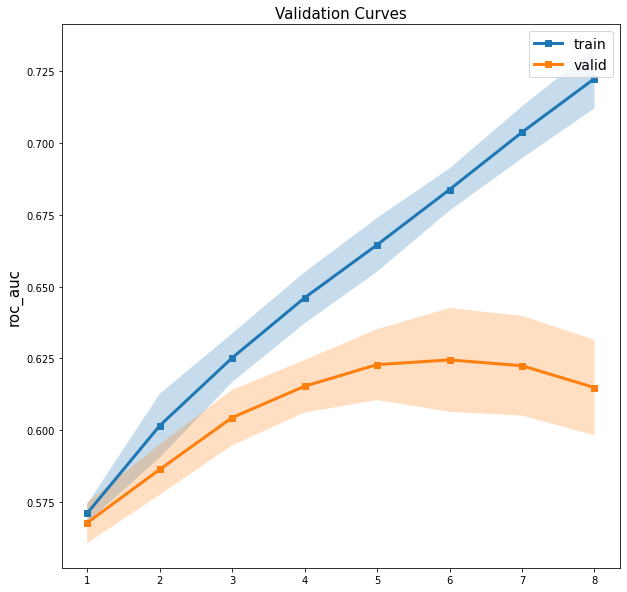

In [14]:
plot_validation_curves(
    train_scores, valid_scores
)